In [65]:
import pandas as pd

df_meter = pd.read_csv('EV_train.csv')
df_label = pd.read_csv('EV_train_labels.csv')
df_test = pd.read_csv('EV_test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [66]:
df_meter.head()

,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11655099,0.950,0.826,0.361,0.238,0.342,0.233000,0.351000,0.194000,0.292000,...,0.664,0.783,0.601,0.639,0.417,0.439,0.226,0.190,0.710,0.728
1,11633257,0.353,0.327,0.358,0.292,0.285,0.304000,0.361000,0.342000,0.355000,...,0.536,0.558,0.622,0.634,0.513,0.421,0.273,0.296,0.291,0.289
2,11651552,0.150,0.181,0.150,0.150,0.131,0.125000,0.088000,0.106000,0.094000,...,2.125,0.881,0.481,1.194,0.138,0.119,0.038,0.088,0.056,0.113
3,11636092,2.088,2.075,2.121,2.098,2.046,2.081000,1.847000,0.420000,0.399000,...,0.620,0.487,0.563,0.419,0.379,0.359,0.347,0.325,0.330,0.340
4,11647239,1.416,1.250,1.270,1.258,1.239,1.753105,4.609256,4.619256,4.075151,...,1.596,1.667,1.569,1.664,1.580,1.635,1.568,1.565,1.575,1.571


In [67]:
df_meter.set_index('House ID', inplace=True)
df_label.set_index('House ID', inplace=True)

In [68]:
# Find null values in training data and training label and drop them
list1 = df_meter[pd.isnull(df_meter).any(axis=1)].index.tolist()
df_meter = df_meter.drop(index=list1)
df_label = df_label.drop(index=list1)

In [69]:
df_meter.shape, df_label.shape

((1586, 2880), (1586, 2880))

In [70]:
a = df_meter.columns == df_label.columns
a.all()

True

In [71]:
ev_label = pd.DataFrame(data = df_label.max(axis=1), index = df_label.index)

In [72]:
ev_label.columns = ['label']

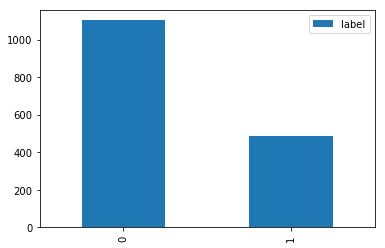

In [73]:
import matplotlib.pyplot as plt
ev_label.label.value_counts().to_frame().plot(kind='bar')
plt.show()

# Unbalanced data

In [74]:
ev_label.label.value_counts()

0    1102
1     484
Name: label, dtype: int64

In [75]:
df_meter.head()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,
11655099,0.950,0.826,0.361,0.238,0.342,0.233000,0.351000,0.194000,0.292000,0.234,...,0.664,0.783,0.601,0.639,0.417,0.439,0.226,0.190,0.710,0.728
11633257,0.353,0.327,0.358,0.292,0.285,0.304000,0.361000,0.342000,0.355000,0.348,...,0.536,0.558,0.622,0.634,0.513,0.421,0.273,0.296,0.291,0.289
11651552,0.150,0.181,0.150,0.150,0.131,0.125000,0.088000,0.106000,0.094000,1.019,...,2.125,0.881,0.481,1.194,0.138,0.119,0.038,0.088,0.056,0.113
11636092,2.088,2.075,2.121,2.098,2.046,2.081000,1.847000,0.420000,0.399000,0.364,...,0.620,0.487,0.563,0.419,0.379,0.359,0.347,0.325,0.330,0.340
11647239,1.416,1.250,1.270,1.258,1.239,1.753105,4.609256,4.619256,4.075151,1.230,...,1.596,1.667,1.569,1.664,1.580,1.635,1.568,1.565,1.575,1.571


In [76]:
df_train = df_meter

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit 


In [78]:
# Time series split to prserve the sequential nature of data

tscv = TimeSeriesSplit(n_splits = 3)
my_cv = tscv.split(df_train)

In [79]:
# class weight set to balanced due to unbalanced data

pipe = Pipeline(steps=[('scaler',StandardScaler()),
                      ('logistic',LogisticRegression(class_weight='balanced'))])

In [80]:
# Scoring was set to compute precision, recall and f1. The model refit was set on f1 score.

param_grid = {'logistic__C':[0.001,0.01,0.01,1,10],
             'logistic__penalty':['l1','l2']}

scoring = {'prc':'precision','rc':'recall','f1':'f1'}

gs = GridSearchCV(estimator = pipe,
                 param_grid=param_grid,
                 scoring=scoring,
                  refit='f1',
                 cv=my_cv)


In [81]:
gs.fit(df_train, ev_label.label)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classific

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x1246ccaf0>,
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logistic__C': [0.001, 0.01, 0.01, 1, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score='warn',
       scoring={'prc': 'precision', 'rc': 'recall', 'f1': 'f1'}, verbose=0)

In [82]:
#best hyper parameters 

gs.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l1'}

In [83]:
#best f1 score
gs.best_score_

0.6727601112848666

In [84]:
f1_list = gs.cv_results_['mean_test_f1']
rc_list = gs.cv_results_['mean_test_rc']
prc_list = gs.cv_results_['mean_test_prc']
result_data=list(zip(f1_list,rc_list,prc_list))
result_frame = pd.DataFrame(result_data, columns=['F1','Recall','Precision'])

In [85]:
result_frame

,F1,Recall,Precision
0,0.000000,0.000000,0.000000
1,0.622008,0.560076,0.705950
2,0.181102,0.160839,0.207207
3,0.646517,0.546302,0.800447
4,0.181102,0.160839,0.207207
5,0.646517,0.546302,0.800447
6,0.672760,0.579219,0.803758
7,0.630070,0.521462,0.802351
8,0.645460,0.543265,0.796815
9,0.628127,0.516870,0.804630


In [86]:
df_nan = df_test[pd.isnull(df_test).any(axis=1)]
df_nan.index

Int64Index([568, 686], dtype='int64')

In [87]:
df_test = df_test.drop(index=df_nan.index)

In [88]:
test_values = df_test.iloc[:,1:]

In [89]:
test_labels = gs.predict(test_values)

In [90]:
from sklearn.metrics import log_loss

In [91]:
in_sample_preds = gs.predict_proba(df_train)
log_loss(ev_label.label,in_sample_preds)

0.07674565980692663